In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import aklab.mpls as mpl # https://github.com/queezz/aklab
from matplotlib.pyplot import rcParams

In [2]:
%run -n ../tmap7.py
%run -n ../graph_tools.py

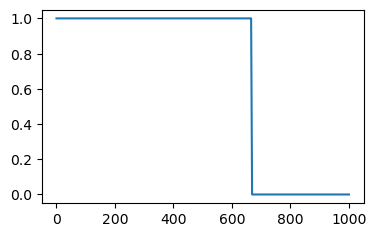

In [3]:
#mpl.font_setup(size=14)
mpl.figprep(width=300)
n = 300
t = np.linspace(0,1000,n)
pressure = np.linspace(1,1,n)
# pressure[200:] = 0.5
pressure[200:] = 0
# pressure[:100] = 
plt.plot(t,pressure)

In [4]:
%run -n ../tmap7.py
piranipath = os.path.abspath('../pirani.dat')
writePirani((t,pressure), piranipath)

<Figure size 432x288 with 0 Axes>

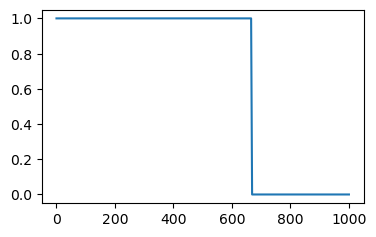

In [5]:
mpl.figprep(width=300)
p = pd.read_csv(os.path.abspath('../pirani.dat'),names=['time','p'])
plt.plot(p['time'],p['p'])

# Check TMAP7 class

run finished
{'ksubd': 1e+17, 'ku': False, 'kd': False, 'dif': False, 'temp': 700, 'tstep': 0.1, 'width1': 1e-07, 'nodes1': 22, 'width2': 0.5, 'nodes2': 100}


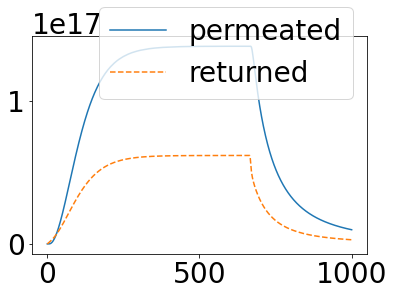

In [31]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
# False means using an initial input
parameters = {
    "ksubd" : 1e17,
    "ku" : False,
    "kd" : False,
    "dif" : False,
    "temp" : 700,
    "tstep" : 0.1 # Must not be False
}
t7.prep_parameters(parameters,"../template2_NiO.inp")
t7.run()
t7.plot()
print(t7.parameters)

run finished
{'ksubd': 1e+17, 'ku': False, 'kd': False, 'dif': False, 'dif_film': False, 'solubility': 3e+30, 'temp': False, 'tstep': 0.1, 'width1': 1e-07, 'nodes1': 22, 'width2': 0.5, 'nodes2': 100}


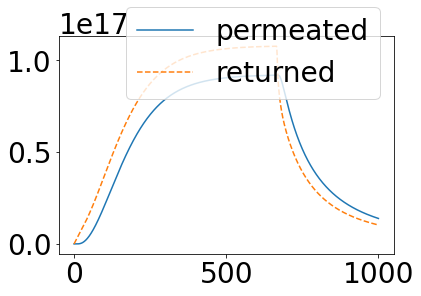

In [37]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
# False means using an initial input
parameters = {
    "ksubd" : 1e17,
    "ku" : False,
    "kd" : False,
    "dif" : False,
    "dif_film":False,
    "solubility":3e30,
    "temp" : False,
    "tstep" : 0.1 # Must not be False
}
t7.prep_parameters(parameters,"../template2_NiO.inp")
t7.run()
t7.plot()
print(t7.parameters)

run finished
{'ksubd': 1e+17, 'ku': False, 'kd': False, 'dif': False, 'temp': False, 'tstep': 0.1, 'width': 0.5, 'nodes': 100}


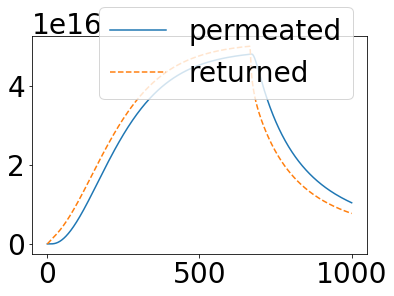

In [24]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
# False means using an initial input
parameters = {
    "ksubd" : 1e17,
    "ku" : False,
    "kd" : False,
    "dif" : False,
    "temp" : False,
    "tstep" : 0.1 # Must not be False
}
t7.prep_parameters(parameters,"../template2_Ni.inp")
t7.run()
t7.plot()
print(t7.parameters)

# Loop

In [15]:
from time import sleep

In [16]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
js = []
kus = [1e-31,1e-30,2e-30,5e-30,1e-29]
difs = [1e-7,1e-8,1e-9,1e-10,1e-11,1e-12]
ts = [300,400,500,600,700,800]
for x in difs:
    parameters = {
        "ksubd" : 1e17,
        "ku" : 2e-29,
        "kd" : 5e-30,
        "dif" : x,
        "temp" : False,
        "tstep" : 0.1
    }
    t7.prep_parameters(parameters,"../template.inp")
    t7.run()     
    #t7.plot()
    #print(t7.parameters)
    #print(f'{t7.data[:,2].max():.2e}\t{t7.gamma.max():.2e}')
    js.append(t7.gamma)

js = np.array(js)

run finished
run finished
run finished
run finished
run finished
run finished


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'PdCu permeeation')

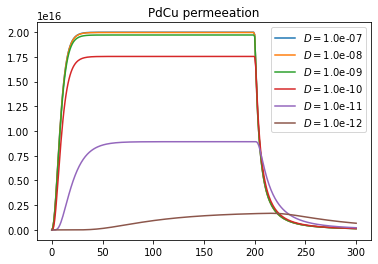

In [17]:
[plt.plot(t7.t,js[i],label=f'$D=${x:.1e}') for i,x in enumerate(difs)]
plt.legend()
plt.title('PdCu permeeation')
# plt.xlim(0,10)


In [18]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
js = []
kus = [1e-31,1e-30,2e-30,5e-30,1e-29]
difs = [1e-7,1e-8,1e-9,1e-10,1e-11,1e-12]
ts = [300,400,500,600,700,800]
for x in difs:
    parameters = {
        "ksubd" : 1e17,
        "ku" : False,
        "kd" : False,
        "dif" : x,
        "temp" : False,
        "tstep" : 0.1
    }
    t7.prep_parameters(parameters,"../template2.inp")
    t7.run()     
    #t7.plot()
    #print(t7.parameters)
    #print(f'{t7.data[:,2].max():.2e}\t{t7.gamma.max():.2e}')
    js.append(t7.gamma)

js = np.array(js)

run finished
run finished
run finished
run finished
run finished
run finished


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Ni permeeation')

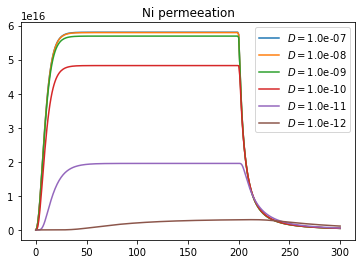

In [19]:
[plt.plot(t7.t,js[i],label=f'$D=${x:.1e}') for i,x in enumerate(difs)]
plt.legend()
plt.title('Ni permeeation')

In [34]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
js = []
jss = []
kus = [1e-31,1e-30,2e-30,5e-30,1e-29]
difs = [1e-7,1e-8,1e-9,1e-10,1e-11,1e-12]
ts = [300,400,500,600,700,800]
for dif in difs:
    js = []
    for ku in kus:
        parameters = {
            "ksubd" : 1e17,
            "ku" : ku,
            "kd" : 5.1e-31,
            "dif" : dif,
            "temp" : 573,
            "tstep" : 0.1
        }
        t7.prep_parameters(parameters,"../template1_pdcu.inp")
        t7.run()     
        #t7.plot()
        #print(t7.parameters)
        #print(f'{t7.data[:,2].max():.2e}\t{t7.gamma.max():.2e}')
        js.append(t7.gamma)
    jss.append(js)
jss = np.array(jss)


run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished


<Figure size 432x288 with 0 Axes>

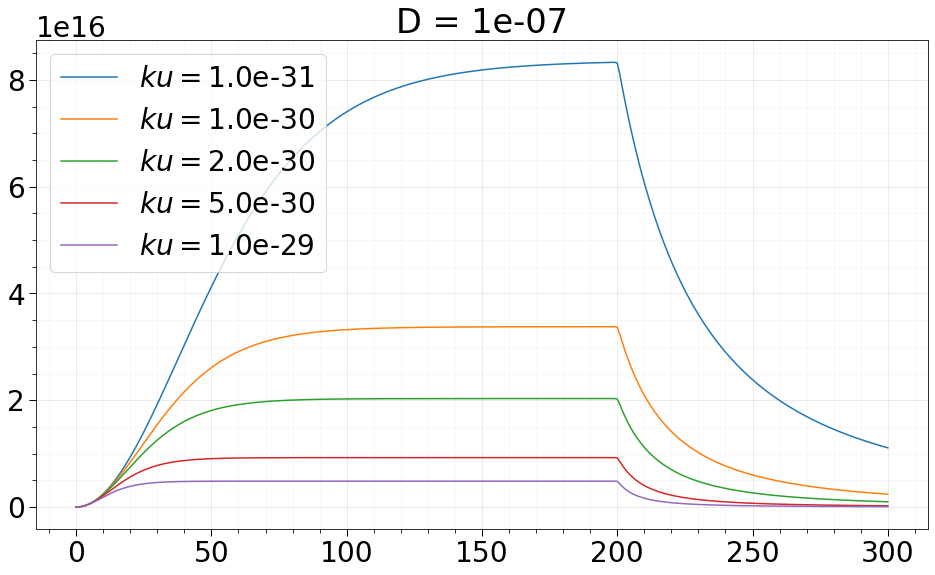

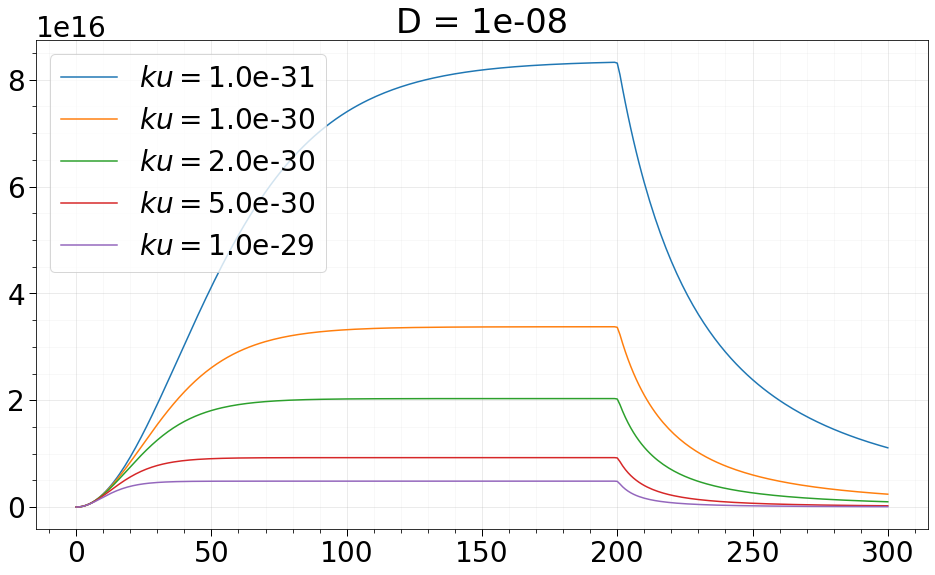

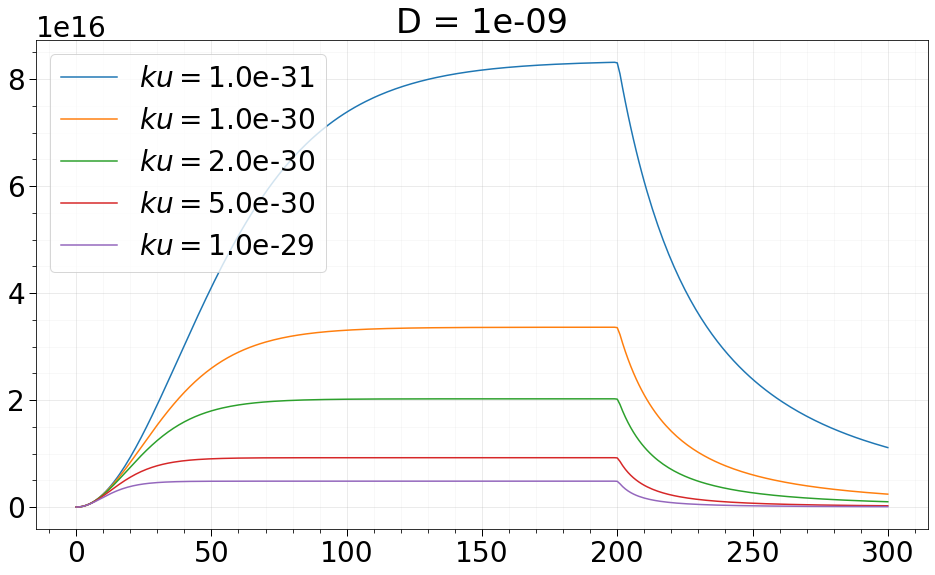

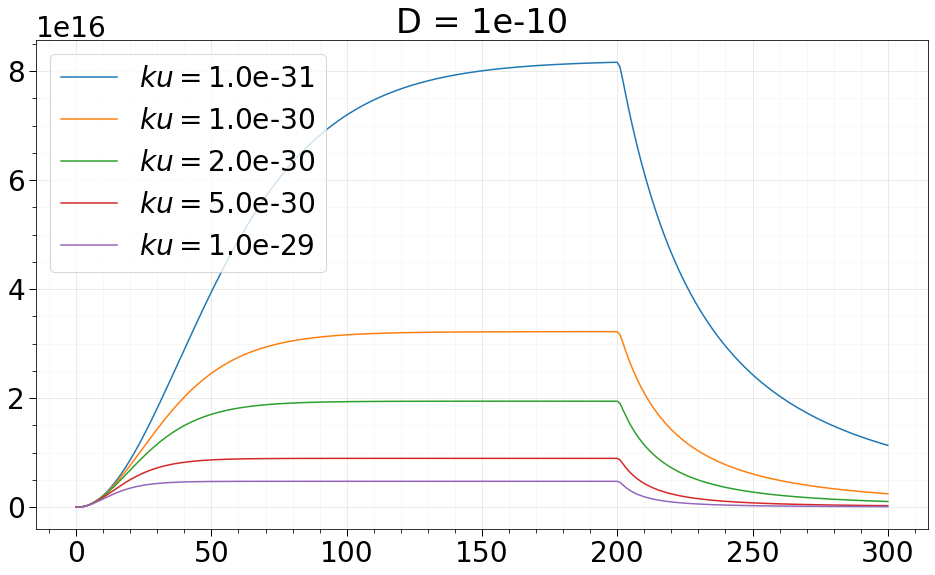

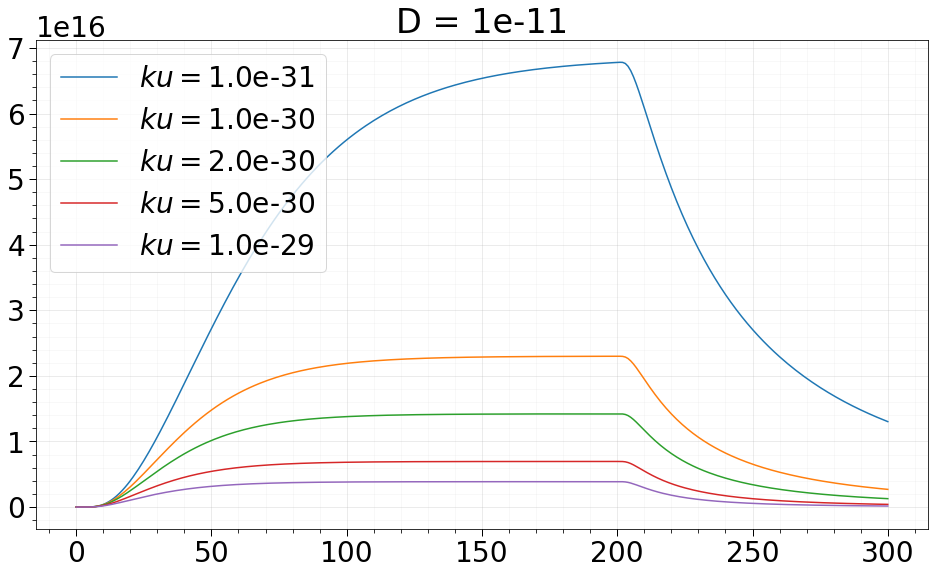

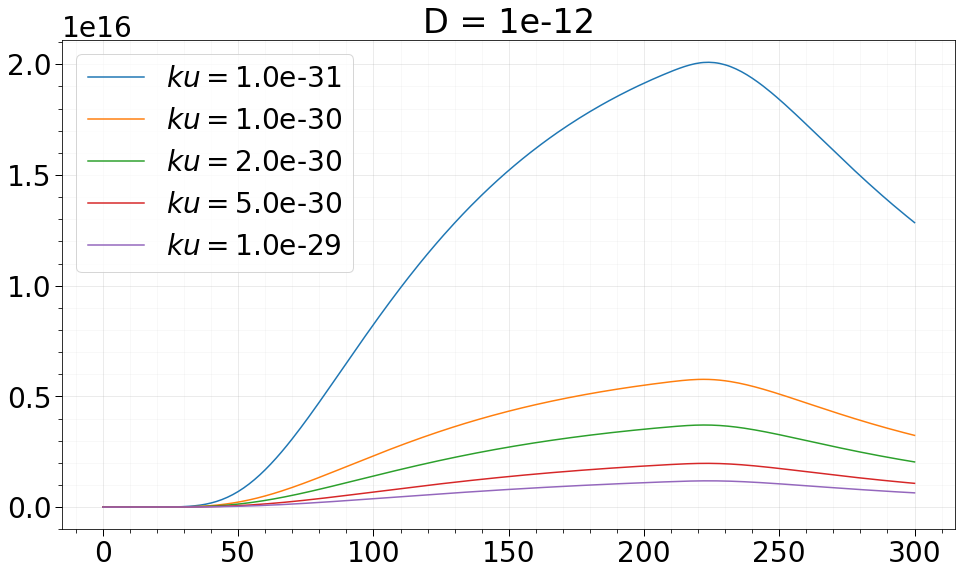

In [35]:
rcParams["font.size"] = 28
for i,dif in enumerate(difs):
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111)
    [ax.plot(t7.t,jss[i][j],label=f'$ku=${ku:.1e}') for j,ku in enumerate(kus)]
    ax.legend(loc="upper left")
    ax.set_title(f'D = {dif}')
    ticks_visual(ax)
    grid_visual(ax)
    fig.savefig(f"../output/PdCu_simulation_D_{dif}")

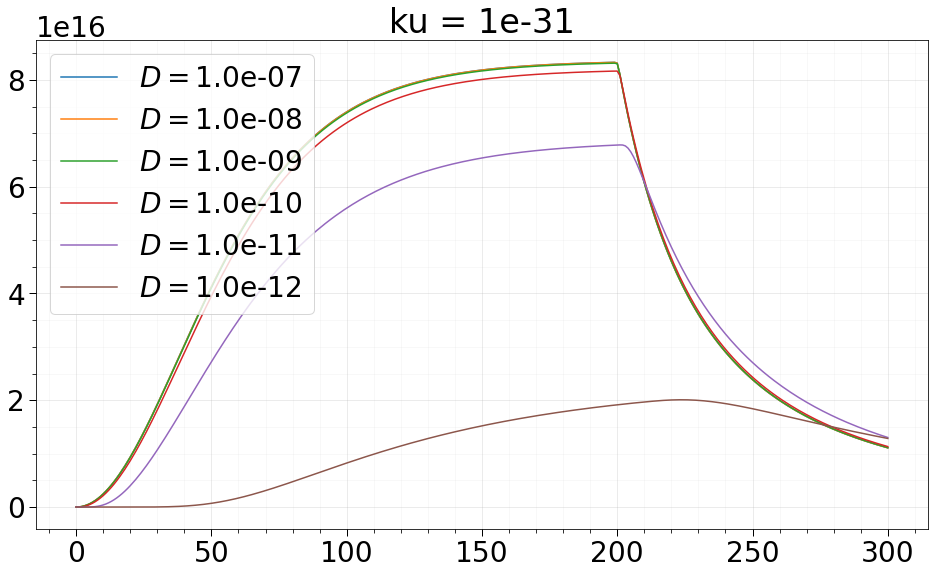

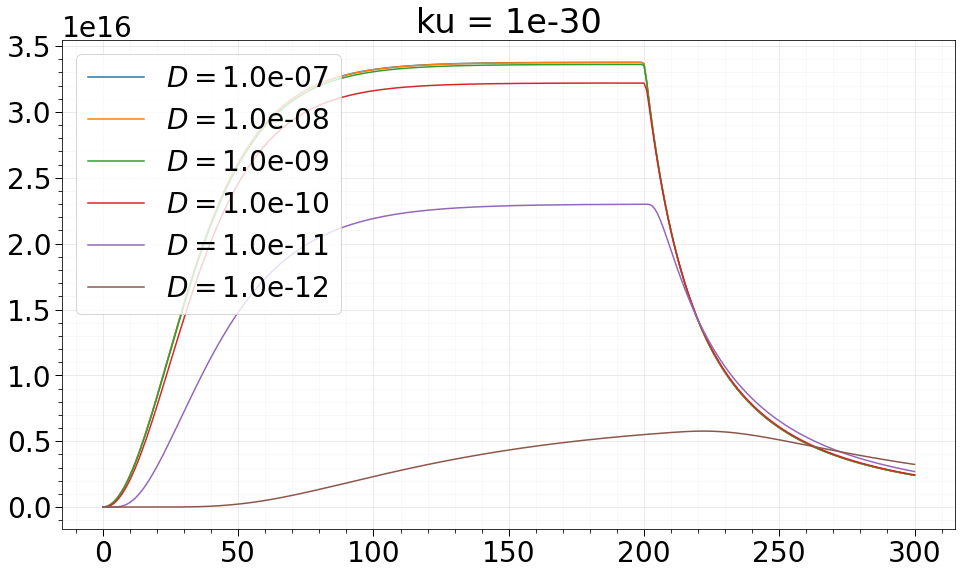

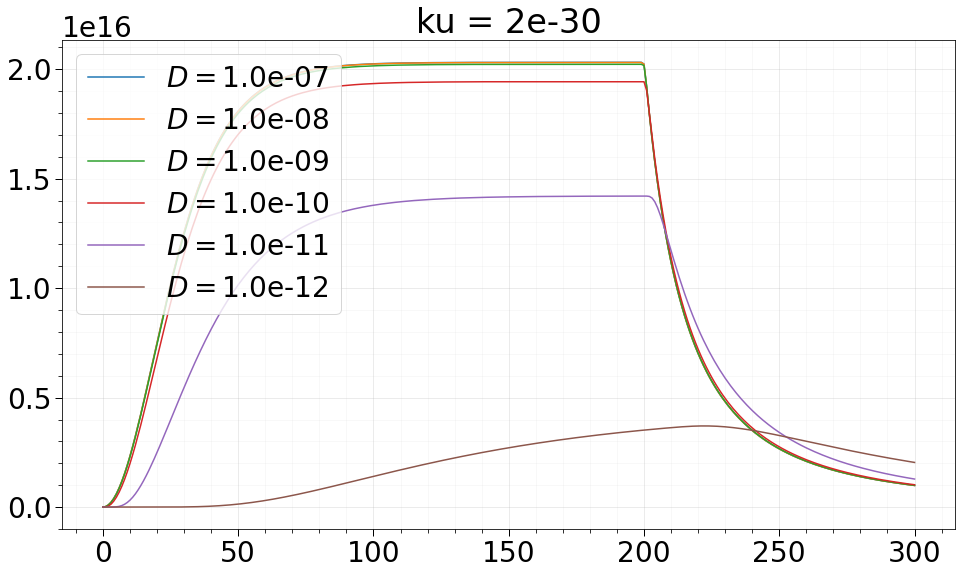

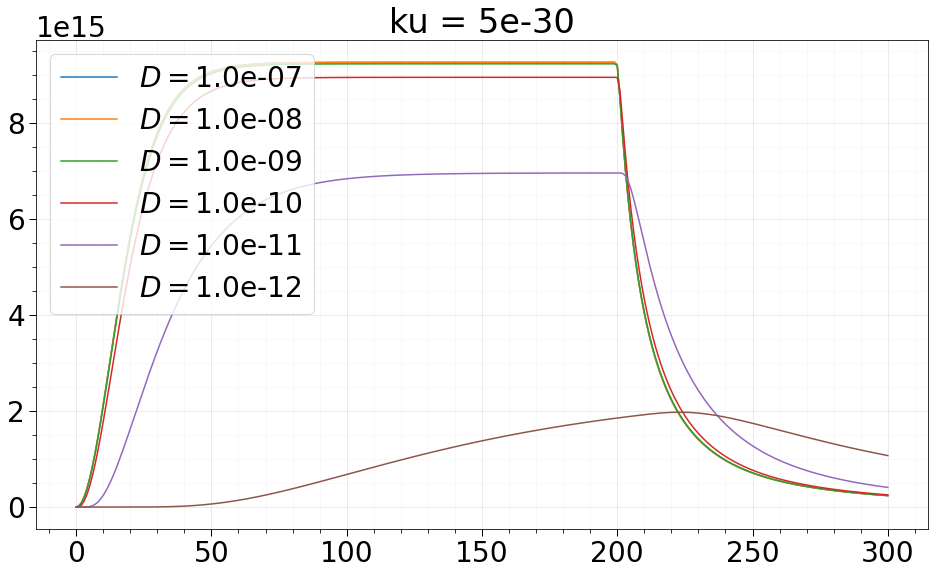

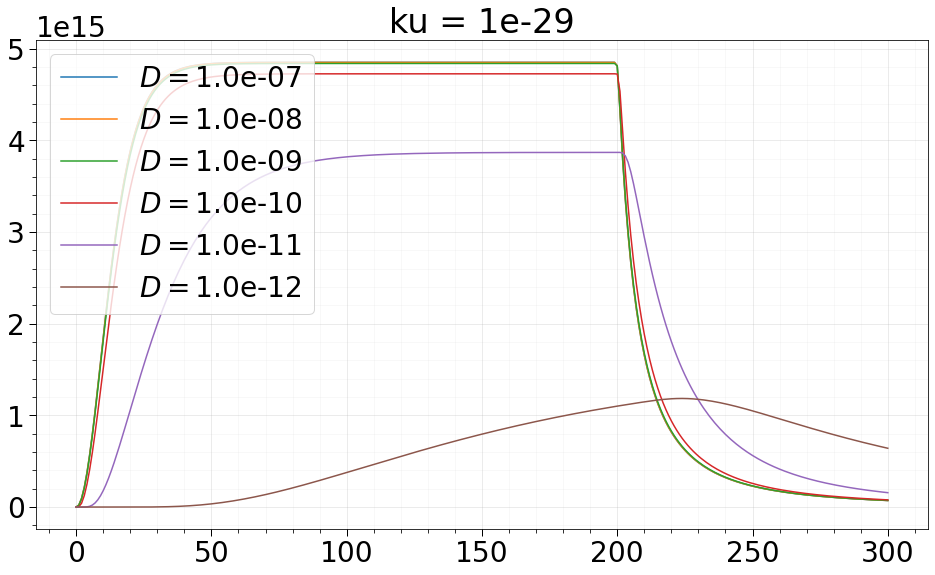

In [36]:
rcParams["font.size"] = 28
for i,ku in enumerate(kus):
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111)
    [ax.plot(t7.t,jss[j][i],label=f'$D=${dif:.1e}') for j,dif in enumerate(difs)]
    ax.legend(loc="upper left")
    ax.set_title(f'ku = {ku}')
    ticks_visual(ax)
    grid_visual(ax)
    fig.savefig(f"../output/PdCu_simulation_ku_{ku}")

In [23]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
js = []
jss = []
kus = [1e-31,1e-30,2e-30,5e-30,1e-29]
difs = [1e-7,1e-8,1e-9,1e-10,1e-11]
ts = [300,400,500,600,700,800]
for dif in difs:
    js = []
    for ku in kus:
        parameters = {
            "ksubd" : 1e17,
            "ku" : ku,
            "kd" : False,
            "dif" : dif,
            "temp" : 873,
            "tstep" : 0.1
        }
        t7.prep_parameters(parameters,"../template2_NiO.inp")
        t7.run()     
        #t7.plot()
        #print(t7.parameters)
        #print(f'{t7.data[:,2].max():.2e}\t{t7.gamma.max():.2e}')
        js.append(t7.gamma)
    jss.append(js)
jss = np.array(jss)


run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished
run finished


<Figure size 432x288 with 0 Axes>

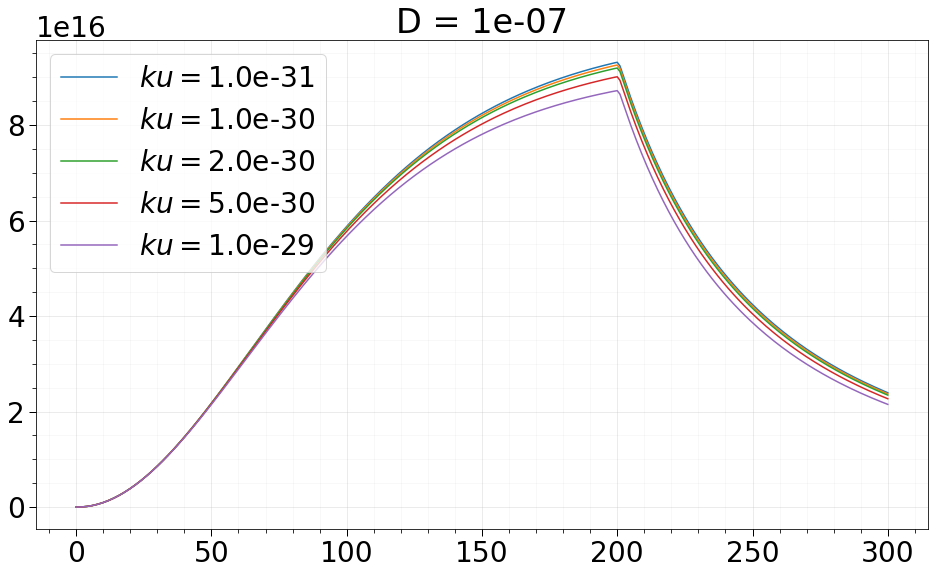

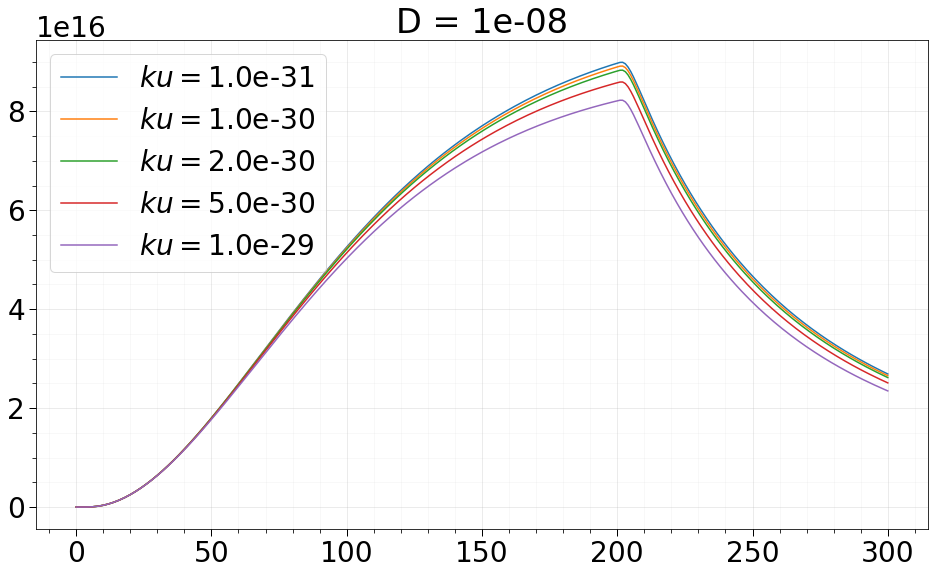

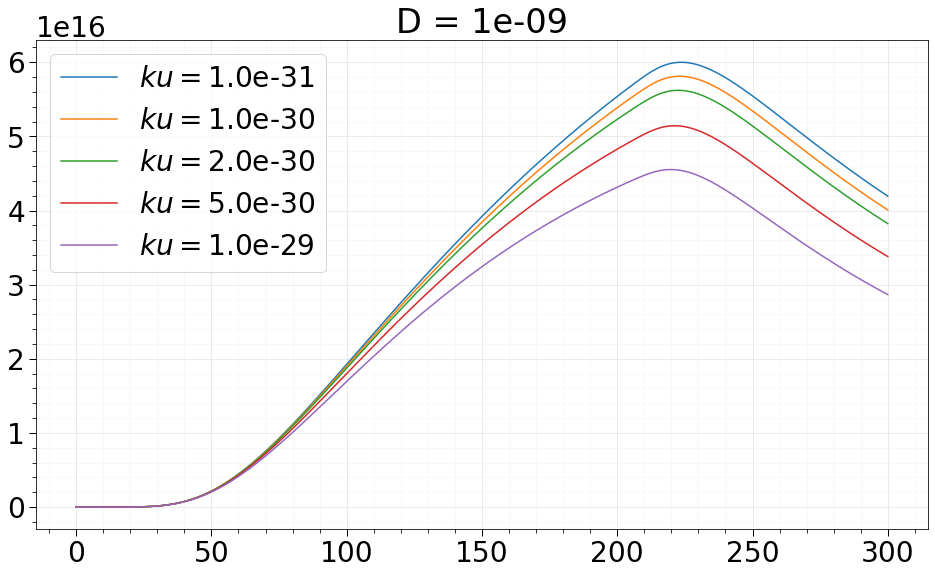

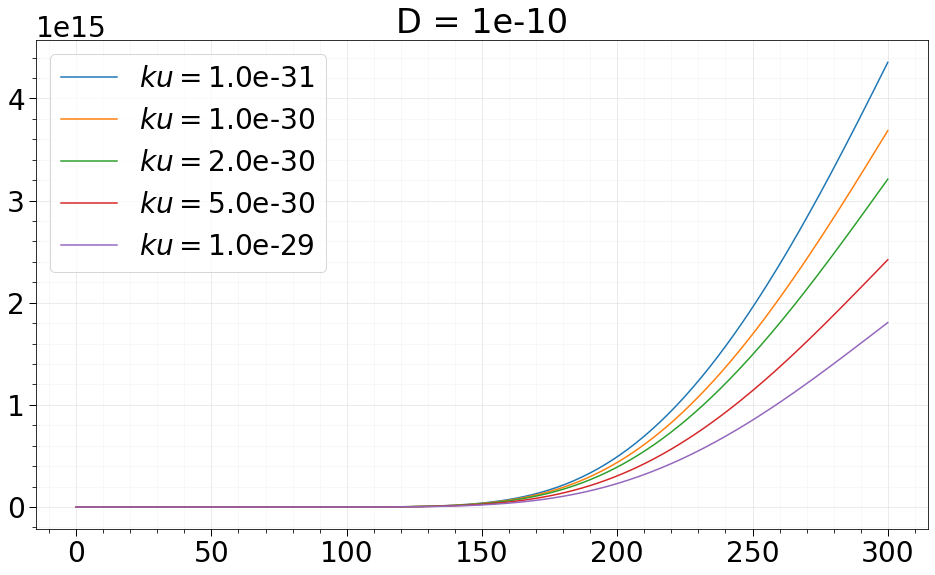

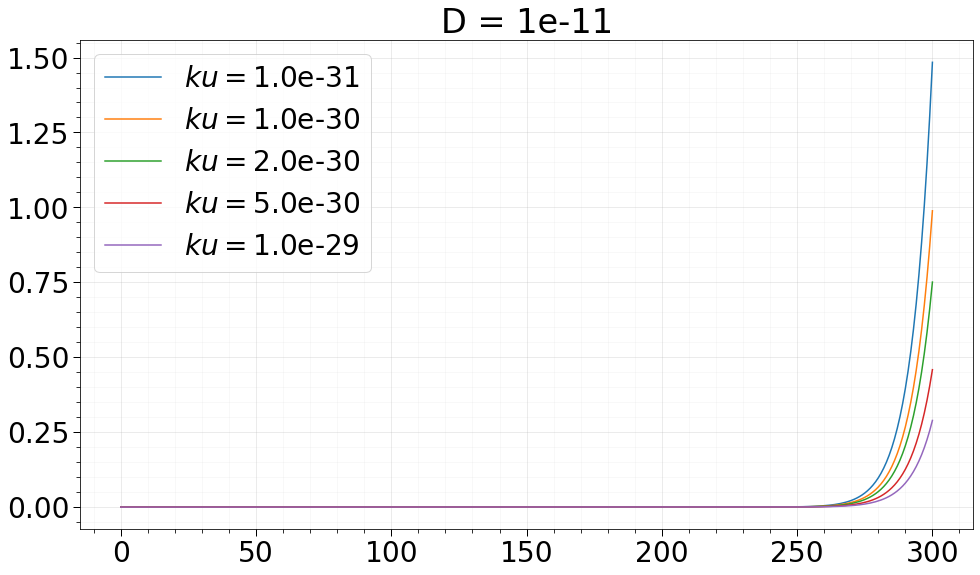

In [24]:
rcParams["font.size"] = 28
for i,dif in enumerate(difs):
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111)
    [ax.plot(t7.t,jss[i][j],label=f'$ku=${ku:.1e}') for j,ku in enumerate(kus)]
    ax.legend(loc="upper left")
    ax.set_title(f'D = {dif}')
    ticks_visual(ax)
    grid_visual(ax)
    fig.savefig(f"../output/Ni_simulation_D_{dif}")

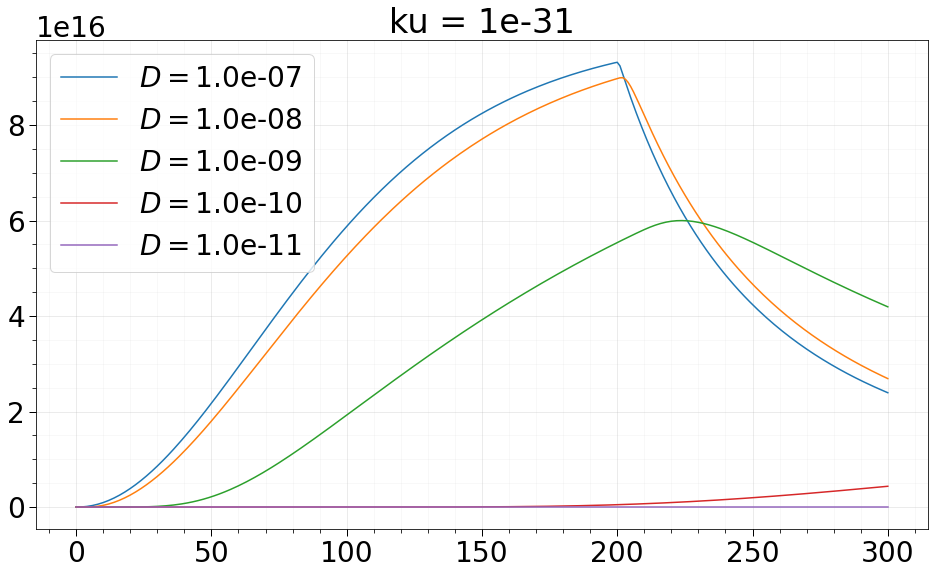

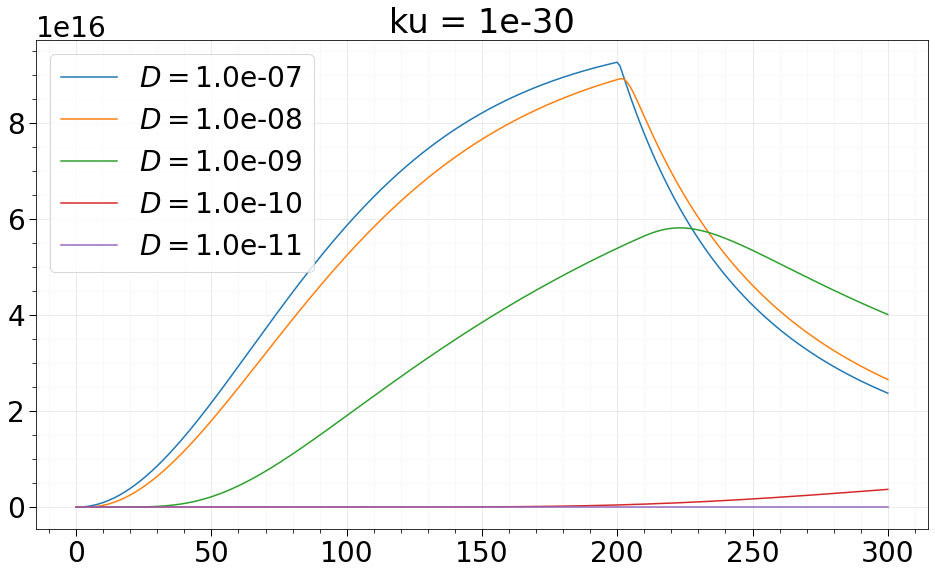

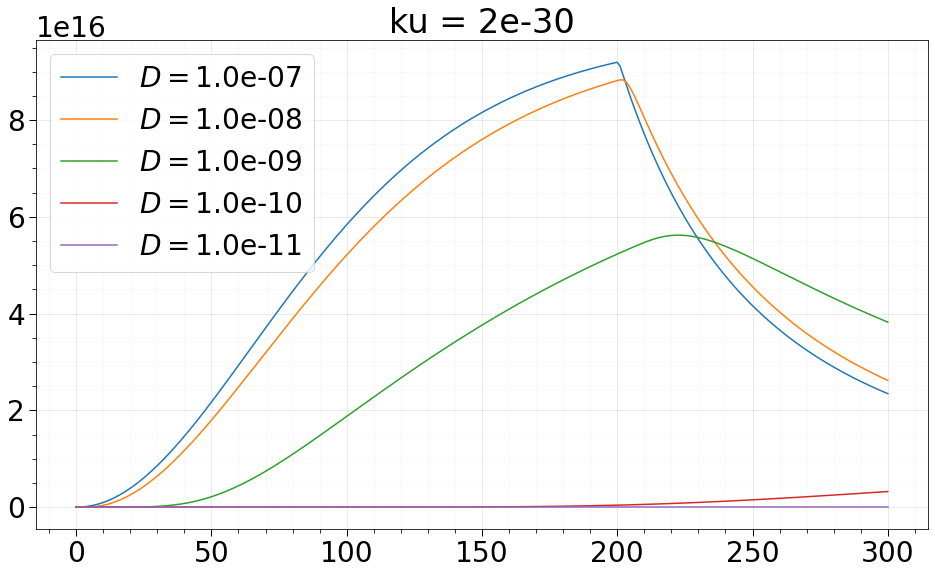

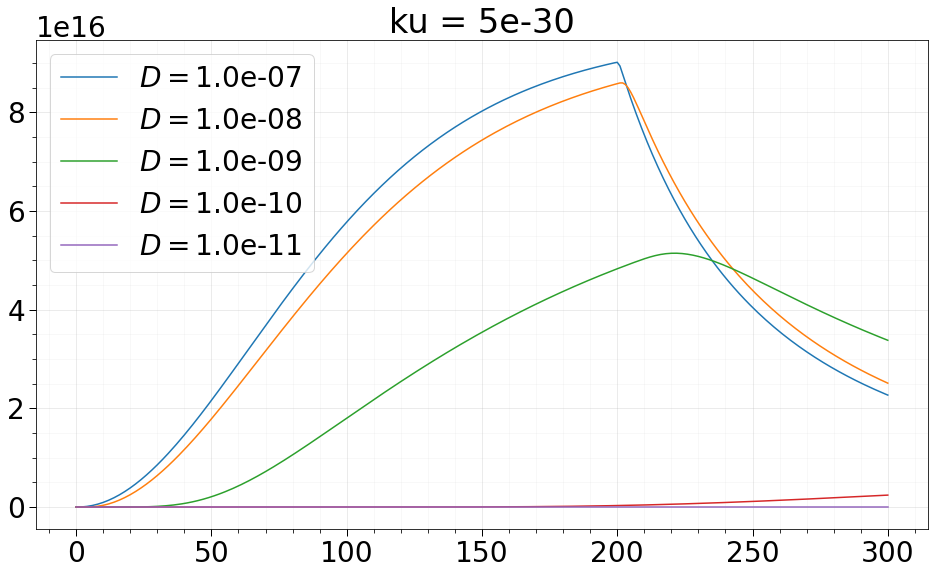

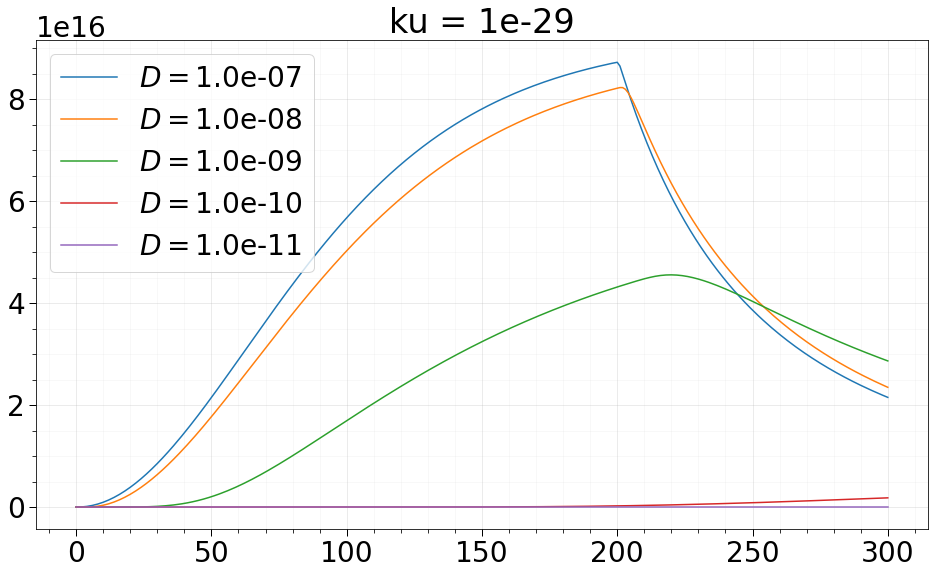

In [25]:
rcParams["font.size"] = 28
for i,ku in enumerate(kus):
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111)
    [ax.plot(t7.t,jss[j][i],label=f'$D=${dif:.1e}') for j,dif in enumerate(difs)]
    ax.legend(loc="upper left")
    ax.set_title(f'ku = {ku}')
    ticks_visual(ax)
    grid_visual(ax)
    fig.savefig(f"../output/Ni_simulation_ku_{ku}")

In [11]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
js = []
kus = [1e-31,1e-30,2e-30,5e-30,1e-29]
difs = [1e-7,1e-8,1e-9,1e-10,1e-11,1e-12]
temps = [300,400,500,600,700,800]
for temp in temps:
    parameters = {
        "ksubd" : 1e17,
        "ku" : False,
        "kd" : False,
        "dif" : False,
        "temp" : temp,
        "tstep" : 0.1
    }
    t7.prep_parameters(parameters,"../template2_Ni.inp")
    t7.run()     
    #t7.plot()
    #print(t7.parameters)
    #print(f'{t7.data[:,2].max():.2e}\t{t7.gamma.max():.2e}')
    js.append(t7.gamma)

js = np.array(js)

run finished
run finished
run finished
run finished
run finished
run finished


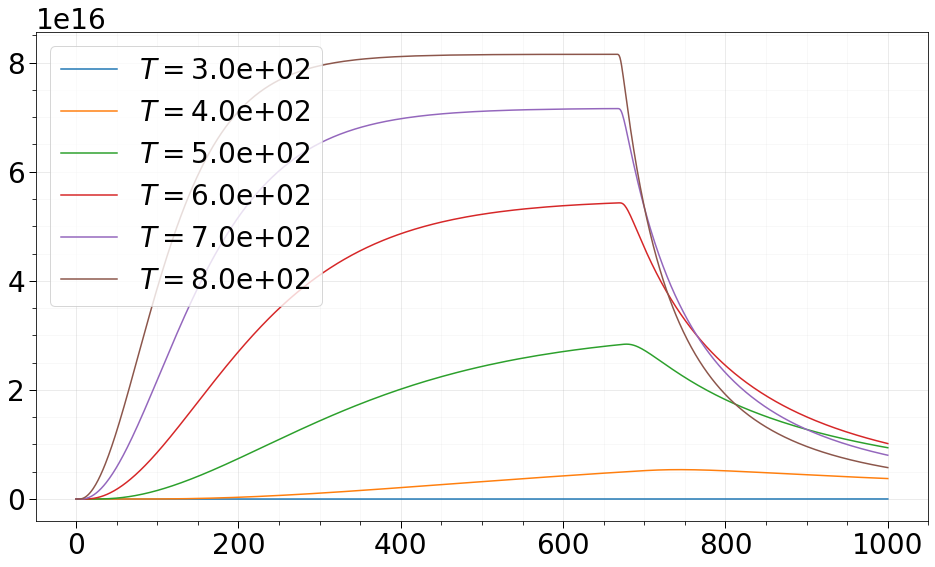

In [12]:
rcParams["font.size"] = 28

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
[ax.plot(t7.t,js[i],label=f'$T=${temp:.1e}') for i,temp in enumerate(temps)]
ax.legend(loc="upper left")
# ax.set_title(f'ku = {ku}')
ticks_visual(ax)
grid_visual(ax)
fig.savefig(f"../output/Ni_simulation_T")